## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Author : Pauline Wambui

# Identifying the business problem

# Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

1. Identify the best performing movies. microsoft will have to identif
2. The cost of production of the movies
3. The competition between different studios in that produce the movies
4. The changing in tastes of different movies
5. the competition between different genres

# Data cleaning process

In [4]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


# 1. Data cleaning in the bom.movie_gross.csv

In [18]:
bom_movies = pd.read_csv("bom.movie_gross.csv")
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [19]:
#to know the number of rows and columns
bom_movies.shape

(3387, 5)

In [20]:
#This is to detect the number of missing values
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [21]:
#This is to get the sum of missing values
bom_movies.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [22]:
#To get the number of duplicated values
bom_movies.duplicated().value_counts()

False    3387
dtype: int64

In [23]:
#Dropped the foreign_gross column since it has many missing values
bom_movies.drop('foreign_gross', axis = 1, inplace= True)
bom_movies

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [24]:
#replacing the number of studio missing values with the mode
bom_movies.isna().sum()

title              0
studio             5
domestic_gross    28
year               0
dtype: int64

In [25]:
#replaced number of domestic_gross values with the median
bom_movies['domestic_gross'].fillna(bom_movies['domestic_gross'].median(), inplace= True)

In [26]:
bom_movies.isna().sum()

title             0
studio            5
domestic_gross    0
year              0
dtype: int64

In [27]:
bom_movies['studio'].fillna('studio', inplace= True)
bom_movies

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [28]:
bom_movies = bom_movies[bom_movies['studio'].notna()]
bom_movies.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [29]:
bom_movies

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [30]:
bom_movies.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [31]:
bom_movies['year']=pd.to_datetime(bom_movies['year'])
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3387 non-null   object        
 1   studio          3387 non-null   object        
 2   domestic_gross  3387 non-null   float64       
 3   year            3387 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 132.3+ KB


# Analysis of bom_movie

In [87]:
bom_movies_grouping = bom_movies.groupby('studio') ['domestic_gross'].mean()

In [88]:
bom_movies_grouping

studio
3D        6.100000e+06
A23       8.210000e+04
A24       6.616208e+06
ADC       1.241000e+05
AF        3.571500e+05
              ...     
YFG       1.100000e+06
Yash      2.359386e+06
Zee       1.100000e+06
Zeit.     3.539688e+05
studio    5.949200e+05
Name: domestic_gross, Length: 258, dtype: float64

In [89]:
bom_df = pd.DataFrame(bom_movies_grouping)
bom_df.head()

,domestic_gross
studio,
3D,6.100000e+06
A23,8.210000e+04
A24,6.616208e+06
ADC,1.241000e+05
AF,3.571500e+05


In [90]:
x = bom_df.sort_values(by = ['domestic_gross'], ascending= False)
x

,domestic_gross
studio,
BV,1.737644e+08
P/DW,1.682900e+08
WB (NL),8.879333e+07
Uni.,8.777138e+07
WB,8.691461e+07
...,...
TAFC,4.600000e+03
Hiber,3.600000e+03
ALP,2.800000e+03


In [91]:
top_studios = x.head(10)
top_studios

,domestic_gross
studio,
BV,1.737644e+08
P/DW,1.682900e+08
WB (NL),8.879333e+07
Uni.,8.777138e+07
WB,8.691461e+07
Fox,8.051103e+07
Sony,7.691894e+07
Par.,7.609773e+07
MGM,6.666667e+07


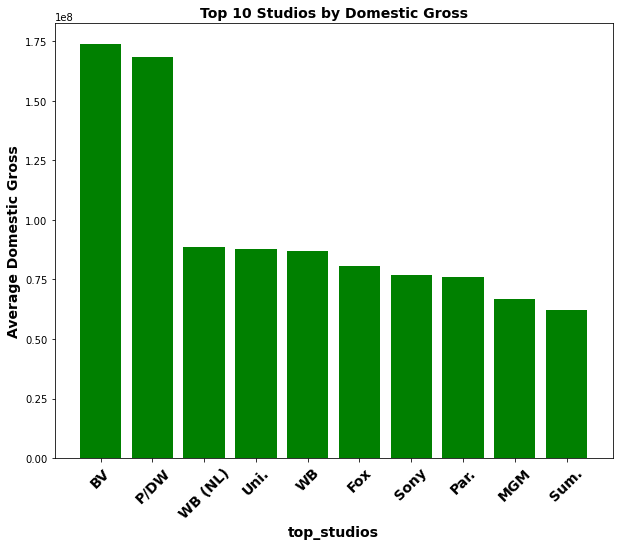

In [92]:
# Create a bar plot of the top 10 studios by domestic gross
plt.bar(top_studios['domestic_gross'].index, top_studios['domestic_gross'].values, color = 'green')
plt.xticks(rotation = 45, fontsize=14, fontweight= 'bold')
plt.xlabel("top_studios", fontsize=14, fontweight='bold')
plt.ylabel("Average Domestic Gross", fontsize =14, fontweight= 'bold')
plt.title("Top 10 Studios by Domestic Gross", fontsize=14, fontweight = 'bold')
plt.gcf().set_size_inches(10,8)
plt.show()

# 2. im.db dataset

In [34]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('im.db')

In [35]:
# import data from movie_ratings
im_df1 = pd.read_sql("""
select * from movie_ratings

""", conn)


In [36]:
im_df1

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [37]:
# checking for any null  values in the data
im_df1.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [38]:
# 
im_df = pd.read_sql("""
select * from movie_basics

""", conn)


In [39]:
im_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [40]:
im_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [41]:
# summing the number of missing values
im_df.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [42]:
# checking for any duplicated values and we found out 
im_df.duplicated().sum()

0

# Joining the two tables

In [43]:
#joining the 2 tables using movie_id
im_df = pd.read_sql("""
SELECT 
primary_title, start_year, genres, averagerating, numvotes
                  FROM movie_basics AS MB
                  JOIN movie_ratings AS MR
                   ON MB.movie_id = MR.movie_id;


""", conn)

In [44]:
im_df


,primary_title,start_year,genres,averagerating,numvotes
0,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,Drama,6.9,4517
3,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...
73851,Diabolik sono io,2019,Documentary,6.2,6
73852,Sokagin Çocuklari,2019,"Drama,Family",8.7,136
73853,Albatross,2017,Documentary,8.5,8
73854,La vida sense la Sara Amat,2019,None,6.6,5


In [75]:

im_db = pd.read_sql("""
                  SELECT primary_title, start_year, genres, averagerating, numvotes
                  FROM movie_basics AS MB
                  JOIN movie_ratings AS MR
                   ON MB.movie_id = MR.movie_id
                   WHERE numvotes > 500000 AND averagerating BETWEEN 6.7 AND 9.0
                   ORDER BY numvotes DESC
                   limit 50;
                  """, conn)

In [76]:
im_db

,primary_title,start_year,genres,averagerating,numvotes
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769
2,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Django Unchained,2012,"Drama,Western",8.4,1211405
4,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655
5,The Wolf of Wall Street,2013,"Biography,Crime,Drama",8.2,1035358
6,Shutter Island,2010,"Mystery,Thriller",8.1,1005960
7,Guardians of the Galaxy,2014,"Action,Adventure,Comedy",8.1,948394
8,Deadpool,2016,"Action,Adventure,Comedy",8.0,820847
9,The Hunger Games,2012,"Action,Adventure,Sci-Fi",7.2,795227


In [77]:
[im_db["genres"].value_counts()]

[Action,Adventure,Sci-Fi       16
 Action,Adventure,Comedy        3
 Action,Adventure,Fantasy       3
 Adventure,Drama,Sci-Fi         2
 Biography,Drama,History        2
 Mystery,Thriller               1
 Adventure,Comedy,Crime         1
 Action,Thriller                1
 Adventure,Family,Fantasy       1
 Action,Adventure,Horror        1
 Drama,Music                    1
 Action,Adventure,Biography     1
 Adventure,Drama,Fantasy        1
 Drama,Thriller                 1
 Biography,Drama                1
 Adventure,Animation,Comedy     1
 Biography,Drama,Thriller       1
 Drama,Western                  1
 Crime,Mystery,Thriller         1
 Action,Sci-Fi                  1
 Biography,Comedy,Drama         1
 Drama,Sci-Fi,Thriller          1
 Adventure,Fantasy              1
 Action,Adventure,Thriller      1
 Biography,Crime,Drama          1
 Action,Adventure,Animation     1
 Drama,Mystery,Thriller         1
 Comedy,Drama,Romance           1
 Action,Drama,Sci-Fi            1
 Name: genres,

Checking if there are any null values in the dataset

In [78]:

null_values = im_df.isna().sum().sum()

if null_values == 0:
    print ('there are {} null values'. format(null_values))
else:
        print ('there are {} null values'. format(null_values))
def duplicate_values(item):
    duplicates = []
    for  x in item.duplicated():
        duplicates.append(x)
    if len(set(duplicates)) == 1:
        print('there are no duplicate rows')
    else: 
        print('there are {} duplicate rows'.format(item.duplicated.value_counts().sum()))
        
duplicate_values(im_db)

there are 804 null values
there are no duplicate rows


In [79]:
# checking the dtypes of the columns in data 
im_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   primary_title  73856 non-null  object 
 1   start_year     73856 non-null  int64  
 2   genres         73052 non-null  object 
 3   averagerating  73856 non-null  float64
 4   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.8+ MB


In [80]:
grouped = im_df.groupby('genres')
grouped.get_group("Action,Adventure,Sci-Fi")

,primary_title,start_year,genres,averagerating,numvotes
52,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.0,539338
63,John Carter,2012,"Action,Adventure,Sci-Fi",6.6,241792
94,Alita: Battle Angel,2019,"Action,Adventure,Sci-Fi",7.5,88207
124,Captain America: The First Avenger,2011,"Action,Adventure,Sci-Fi",6.9,668137
217,Man of Steel,2013,"Action,Adventure,Sci-Fi",7.1,647288
...,...,...,...,...,...
69185,Atlantic Rim: Resurrection,2018,"Action,Adventure,Sci-Fi",1.7,597
70159,Alien Siege,2018,"Action,Adventure,Sci-Fi",2.3,279
71733,Jurassic Galaxy,2018,"Action,Adventure,Sci-Fi",3.0,70
72407,Battle Bots,2018,"Action,Adventure,Sci-Fi",2.4,87


In [84]:
genres_sorted_mean = pd.DataFrame(im_df.groupby("genres")["numvotes"].mean()).sort_values(by="numvotes", ascending= False).head(10)
genres_sorted_mean

,numvotes
genres,
"Action,Adventure,Sci-Fi",181285.417323
"Adventure,Mystery,Sci-Fi",135042.500000
"Action,Fantasy,War",131509.000000
"Adventure,Drama,Sci-Fi",99316.950000
"Action,Adventure,Fantasy",93775.563107
"Biography,Drama,Thriller",84506.909091
"Action,Crime,Sci-Fi",78214.125000
"Action,Adventure,Thriller",74964.800000
"Action,Adventure,Mystery",66149.272727


# competition between different genres in the movie industry

There is competition between different denres movies in the industry. The bar graph below shows how different movies are doing.

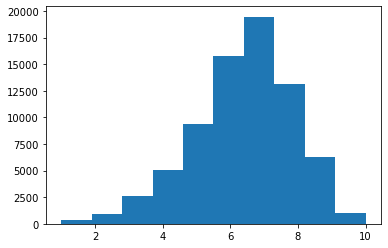

In [74]:
plt.hist(im_df["averagerating"], bins = 10);

The histogram has 10 bins which represent the range of values of 'averagerating' data divided into 10 equal intervals. The x-axis represents the intervals and the y-axis shows the count of observations that fall within each bin.

In [ ]:
im_db = pd.read_sql("""
                  SELECT primary_title, start_year, genres, averagerating, numvotes
                  FROM movie_basics AS MB
                  JOIN movie_ratings AS MR
                   ON MB.movie_id = MR.movie_id
                   WHERE numvotes > 500000 AND averagerating BETWEEN 6.7 AND 9.0
                   ORDER BY numvotes DESC
                   limit 50;
                  """, conn)

In [104]:
im_db

,primary_title,start_year,genres,averagerating,numvotes
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769
2,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Django Unchained,2012,"Drama,Western",8.4,1211405
4,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655
5,The Wolf of Wall Street,2013,"Biography,Crime,Drama",8.2,1035358
6,Shutter Island,2010,"Mystery,Thriller",8.1,1005960
7,Guardians of the Galaxy,2014,"Action,Adventure,Comedy",8.1,948394
8,Deadpool,2016,"Action,Adventure,Comedy",8.0,820847
9,The Hunger Games,2012,"Action,Adventure,Sci-Fi",7.2,795227


In [105]:
genres_sorted_mean = pd.DataFrame(im_df.groupby("genres")["numvotes"].mean()).sort_values(by="numvotes", ascending= False).head(10)
genres_sorted_mean

,numvotes
genres,
"Action,Adventure,Sci-Fi",181285.417323
"Adventure,Mystery,Sci-Fi",135042.500000
"Action,Fantasy,War",131509.000000
"Adventure,Drama,Sci-Fi",99316.950000
"Action,Adventure,Fantasy",93775.563107
"Biography,Drama,Thriller",84506.909091
"Action,Crime,Sci-Fi",78214.125000
"Action,Adventure,Thriller",74964.800000
"Action,Adventure,Mystery",66149.272727


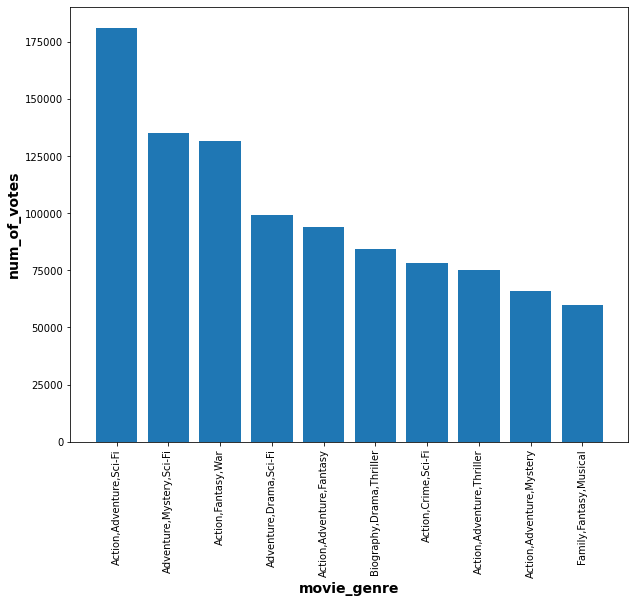

In [85]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90, fontsize=10)
y = genres_sorted_mean["numvotes"]
plt.xlabel("movie_genre", fontsize=14, fontweight='bold')
plt.ylabel("num_of_votes", fontsize =14, fontweight= 'bold')

plt.bar(y.index, y.values);

The plot can be useful in identifying which movie genres are more popular among users, which can be helpful in making decisions related to marketing and distribution of movies.


# Data cleaning for  movie budget dataset

In [52]:
movie_budget = pd.read_csv("tn.movie_budgets.csv" , index_col=0)
movie_budget

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [53]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [54]:
#checking the missing values in the movie_budget dataset which s
movie_budget.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [55]:
movie_budget.duplicated().value_counts()

False    5782
dtype: int64

In [56]:
#we convert production_budget, domestic_gross and worldwide_gross columns from objects to floats
#we then remove the dollar signs ($) and commas from the values
movie_budget['production_budget'] = movie_budget['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)


In [57]:
#we then verify that the values in the production_budget, domestic_gross and worldwide_gross columns are now float data types
movie_budget.dtypes
print(movie_budget.dtypes)

release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object


In [13]:
movie_budget

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03


In [14]:
movie_budget = movie_budget.drop(['release_date'], axis = 1)
movie_budget

,movie,production_budget,domestic_gross,worldwide_gross
id,,,,
1,Avatar,425000000.0,760507625.0,2.776345e+09
2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...
78,Red 11,7000.0,0.0,0.000000e+00
79,Following,6000.0,48482.0,2.404950e+05
80,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03


In [64]:
movie_budget['return_on_inv'] = ((movie_budget['domestic_gross'] + movie_budget['worldwide_gross'] - movie_budget['production_budget']) / movie_budget['production_budget']).round(2)

In [65]:
movie_budget.head(20)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_inv
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,7.32
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2.13
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-0.45
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,4.63
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,5.11


In [66]:
movie_budget_sample = movie_budget.sort_values(by = 'return_on_inv', ascending= False).head(20).iloc[1:20]
movie_budget_sample

,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_inv
id,,,,,,
93,"Sep 25, 2009",Paranormal Activity,450000.0,107918810.0,194183034.0,670.34
7,"Jul 14, 1999",The Blair Witch Project,600000.0,140539099.0,248300000.0,647.07
80,"Jul 10, 2015",The Gallows,100000.0,22764410.0,41656474.0,643.21
74,"Feb 26, 1993",El Mariachi,7000.0,2040920.0,2041928.0,582.26
14,"Mar 21, 1980",Mad Max,200000.0,8750000.0,99750000.0,541.50
10,"May 7, 2004",Super Size Me,65000.0,11529368.0,22233808.0,518.43
47,"Aug 13, 1942",Bambi,858000.0,102797000.0,268000000.0,431.16
16,"Aug 9, 1995",The Brothers McMullen,50000.0,10426506.0,10426506.0,416.06
66,"Oct 18, 1974",The Texas Chainsaw Massacre,140000.0,26572439.0,26572439.0,378.61


In [58]:
#summary statistics
movie_budget.describe()

,production_budget,domestic_gross,worldwide_gross
count,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07
std,4.181208e+07,6.824060e+07,1.747200e+08
min,1.100000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.429534e+06,4.125415e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07
max,4.250000e+08,9.366622e+08,2.776345e+09


In [ ]:
movie_budget['return_on_inv'] = ((movie_budget['domestic_gross'] + movie_budget['worldwide_gross'] - movie_budget['production_budget']) / movie_budget['production_budget']).round(2)

In [67]:
correlation_pr_dm = round(movie_budget['production_budget'].corr(movie_budget['return_on_inv']),4)*100
print("The correlation between prod budg and dom gross rev is :", correlation_pr_dm, "%")

The correlation between prod budg and dom gross rev is : -4.9 %


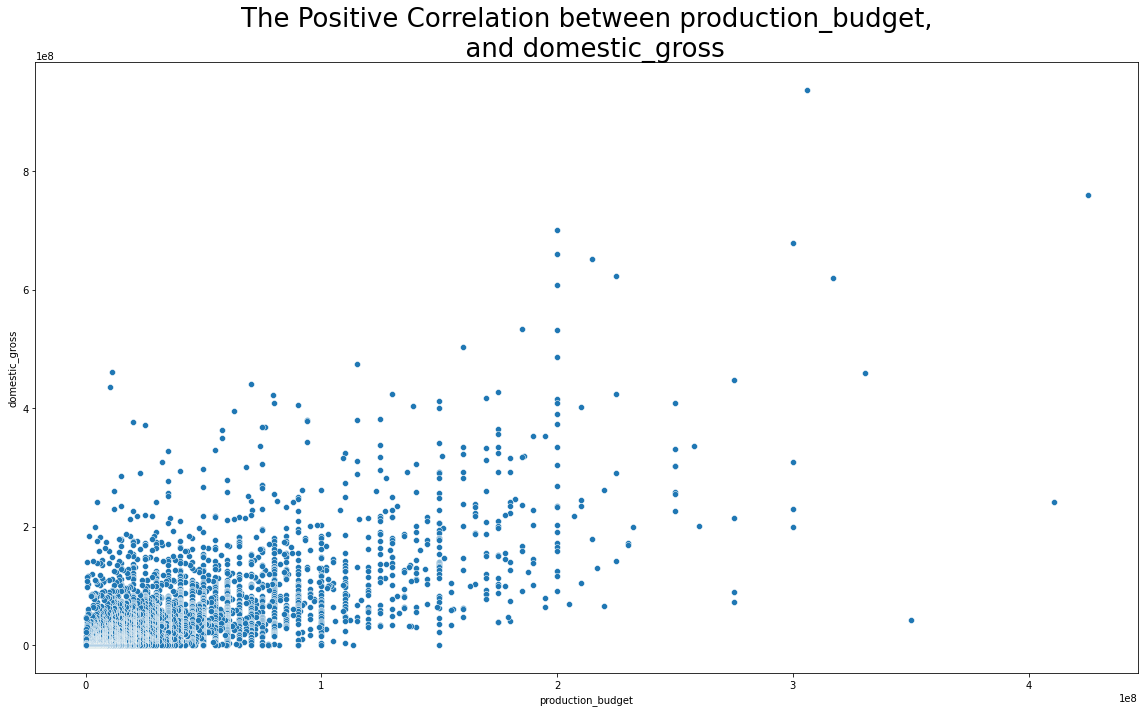

In [62]:
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='production_budget', y='domestic_gross', data = movie_budget,)
plt.title("The Positive Correlation between production_budget,\n  and domestic_gross", fontsize=26)
plt.tight_layout()
plt.show()

# Data analysis for the cost of production in the movie industry

Inorder to understand the the return on investment that the movies made, we'll have to look at the buget that the movies had and what they made after the movie was made. This will help us to understand the movies that made the most profit and hence will be able to know what type of movies to produce

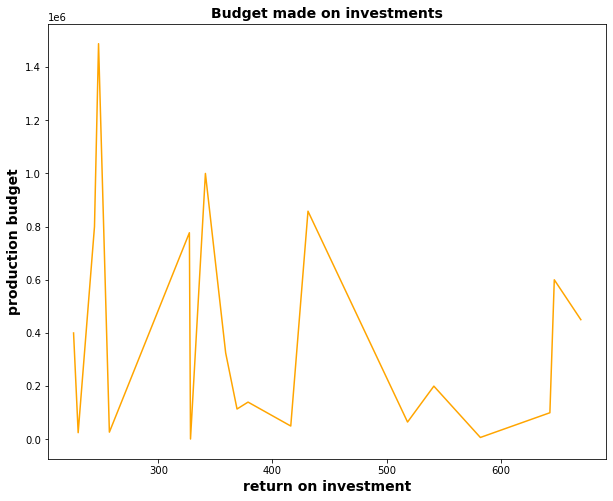

In [71]:
x = movie_budget_sample["return_on_inv"]
y = movie_budget_sample['production_budget'] 
plt.xlabel("return on investment", fontsize=14, fontweight='bold')
plt.ylabel("production budget", fontsize =14, fontweight= 'bold')
plt.title("Budget made on investments", fontsize=14, fontweight = 'bold')
plt.gcf().set_size_inches(10,8)
plt.plot(x,y, color = 'orange');

# Data analysis for competition in movie industry

we are going to look at the competition between different studios in order to identify the studio that made the most from the movie production.we are going to use the bom_movies dataset inorder to anlyse our data

In [235]:
bom_movies_grouping = bom_movies.groupby('studio') ['domestic_gross'].mean()

In [236]:
bom_movies_grouping

studio
3D        6.100000e+06
A23       8.210000e+04
A24       6.616208e+06
ADC       1.241000e+05
AF        3.571500e+05
              ...     
YFG       1.100000e+06
Yash      2.359386e+06
Zee       1.100000e+06
Zeit.     3.539688e+05
studio    5.949200e+05
Name: domestic_gross, Length: 258, dtype: float64

In [252]:
bom_df = pd.DataFrame(bom_movies_grouping)
bom_df.head()

,domestic_gross
studio,
3D,6.100000e+06
A23,8.210000e+04
A24,6.616208e+06
ADC,1.241000e+05
AF,3.571500e+05


In [264]:
x = bom_df.sort_values(by = ['domestic_gross'], ascending= False)
x

,domestic_gross
studio,
BV,1.737644e+08
P/DW,1.682900e+08
WB (NL),8.879333e+07
Uni.,8.777138e+07
WB,8.691461e+07
...,...
TAFC,4.600000e+03
Hiber,3.600000e+03
ALP,2.800000e+03


In [266]:
top_studios = x.head(10)
top_studios

,domestic_gross
studio,
BV,1.737644e+08
P/DW,1.682900e+08
WB (NL),8.879333e+07
Uni.,8.777138e+07
WB,8.691461e+07
Fox,8.051103e+07
Sony,7.691894e+07
Par.,7.609773e+07
MGM,6.666667e+07


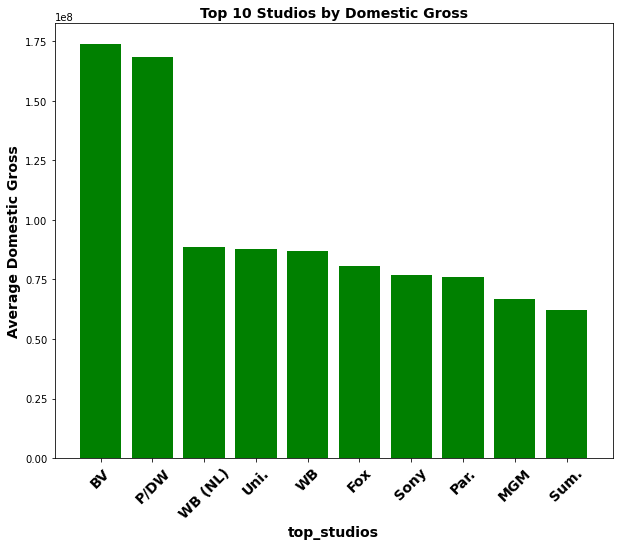

In [299]:
# Create a bar plot of the top 10 studios by domestic gross
plt.bar(top_studios['domestic_gross'].index, top_studios['domestic_gross'].values, color = 'green')
plt.xticks(rotation = 45, fontsize=14, fontweight= 'bold')
plt.xlabel("top_studios", fontsize=14, fontweight='bold')
plt.ylabel("Average Domestic Gross", fontsize =14, fontweight= 'bold')
plt.title("Top 10 Studios by Domestic Gross", fontsize=14, fontweight = 'bold')
plt.gcf().set_size_inches(10,8)
plt.show()

In [95]:
studio_data = bom_movies.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False)
studio_data

studio
BV            1.841903e+10
Uni.          1.290239e+10
WB            1.216805e+10
Fox           1.094950e+10
Sony          8.461083e+09
                  ...     
TAFC          4.600000e+03
Hiber         3.600000e+03
ALP           2.800000e+03
Synergetic    2.400000e+03
DR            8.000000e+02
Name: domestic_gross, Length: 258, dtype: float64

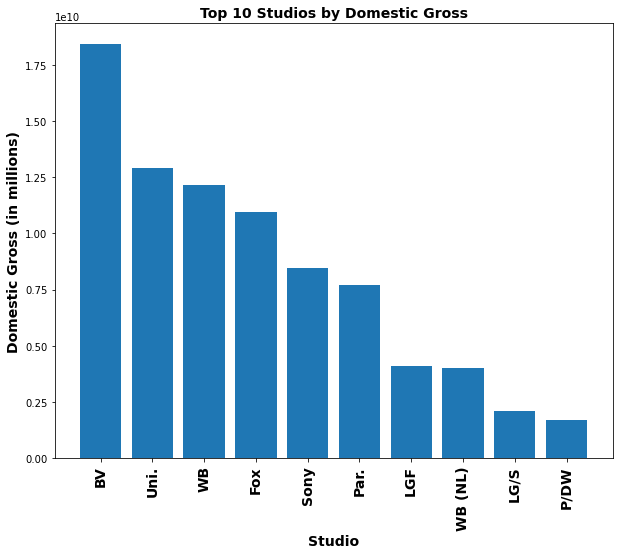

In [102]:
top_10_studios = studio_data[:10]
plt.bar(top_10_studios.index, top_10_studios.values)
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.xlabel('Studio',fontsize=14, fontweight= 'bold' )
plt.ylabel('Domestic Gross (in millions)',fontsize=14, fontweight='bold')
plt.title('Top 10 Studios by Domestic Gross',fontsize=14, fontweight='bold')
plt.gcf().set_size_inches(10,8)
plt.show()

The graph displays the top 10 studios based on their domestic gross in millions. The graph is a bar chart, where the x-axis shows the name of the studios, and the y-axis shows their domestic gross in millions. The bar chart is easy to read and understand, and the use of color can enhance the presentation.
Based on the graph, it is clear that the Walt Disney Studios Motion Pictures is the top-grossing studio, with a domestic gross of over $11 billion, followed by Warner Bros. Pictures, Universal

from the bar graph above,one is able to show the the BV studio made the highest domestic gross from the movies that they produced.This shows that the BV studios made the movies thet were really watche and i would like to reccomend th microsoft team to make the same type of movies since they will get more audience